In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'C:\Users\tesla\OneDrive\Desktop\AI-Artificial-Inteligence-\ML practice\Feature Engineering\movies rating.csv')
data=df


In [6]:
st =[  'Gross', 'Foreign Profit']
flt=['International View', 'National View']

for i in flt:
       data[i]=df[i].str.replace(r'[$,]', '', regex=True).str.replace('%', '', regex=True).replace('-', 0).astype(float)

In [12]:
data.drop(['Unnamed: 0','Movie','World Profit'],axis=1,inplace=True)

In [13]:
data

,Rank,Gross,National View,Foreign Profit,International View
0,1,652980194,38.4,1045883622,61.6
1,2,636745858,47.6,701327787,52.4
2,3,450182382,43.8,576717296,56.2
3,4,361004205,37.3,608122247,62.7
4,5,468982125,65.4,248383000,34.6
...,...,...,...,...,...
195,196,0,0.0,8467953,100.0
196,197,0,0.0,8165361,100.0
197,198,0,0.0,8108856,100.0
198,199,8093190,100.0,0,0.0


In [16]:
data.describe()

,Rank,Gross,National View,Foreign Profit,International View
count,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000
mean,100.500000,4.085433e+07,31.673000,5.749218e+07,68.326500
std,57.879185,9.511574e+07,31.972637,1.242885e+08,31.972487
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,50.750000,0.000000e+00,0.000000,9.601118e+06,45.825000
50%,100.500000,6.898654e+06,29.850000,1.685186e+07,70.150000
75%,150.250000,2.826580e+07,54.175000,4.009352e+07,100.000000
max,200.000000,6.529802e+08,100.000000,1.045884e+09,100.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                200 non-null    int64  
 1   Gross               200 non-null    int32  
 2   National View       200 non-null    float64
 3   Foreign Profit      200 non-null    int32  
 4   International View  200 non-null    float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 6.4 KB


In [28]:
data.columns

Index(['Rank', 'Gross', 'National View', 'Foreign Profit',
       'International View'],
      dtype='object')

In [44]:
X=data[['Rank', 'National View', 'Foreign Profit', 'International View']]
y=data.iloc[:,1:2]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [97]:
from sklearn.preprocessing import MaxAbsScaler
mm=MaxAbsScaler()
X_train_S=mm.fit_transform(X_train)
y_train_S=mm.fit_transform(y_train)
X_test_S=mm.fit_transform(X_test)
y_test_S=mm.fit_transform(y_test)
# from sklearn.preprocessing import MaxAbsScaler
# mm=MaxAbsScaler()
# X_train_S=mm.fit_transform(X_train)
# y_train_S=mm.fit_transform(y_train)
# X_test_S=mm.fit_transform(X_test)
# y_test_S=mm.fit_transform(y_test)
# from sklearn.preprocessing import MinMaxScaler
# mm=MinMaxScaler()
# X_train_S=mm.fit_transform(X_train)
# y_train_S=mm.fit_transform(y_train)
# X_test_S=mm.fit_transform(X_test)
# y_test_S=mm.fit_transform(y_test)
# from sklearn.preprocessing import StandardScaler
# mm=StandardScaler()
# X_train_S=mm.fit_transform(X_train)
# y_train_S=mm.fit_transform(y_train)
# X_test_S=mm.fit_transform(X_test)
# y_test_S=mm.fit_transform(y_test)

In [98]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lrs=LinearRegression()
lr.fit(X_train,y_train)
lrs.fit(X_train_S,y_train_S)


LinearRegression()

In [99]:
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))
print(lrs.score(X_test_S,y_test_S))
print(lrs.score(X_train_S,y_train_S))

0.7388509941354251
0.9007786281943497
0.5254911373147599
0.9007786281943496


In [100]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rfs=RandomForestRegressor()
rf.fit(X_train,y_train)
rfs.fit(X_train_S,y_train_S)

C:\Users\tesla\AppData\Local\Temp\ipykernel_24028\3607846806.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
C:\Users\tesla\AppData\Local\Temp\ipykernel_24028\3607846806.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfs.fit(X_train_S,y_train_S)


RandomForestRegressor()

In [101]:
print(rf.score(X_test,y_test))
print(rfs.score(X_test_S,y_test_S))

0.9510528622141967
0.8796639535565312


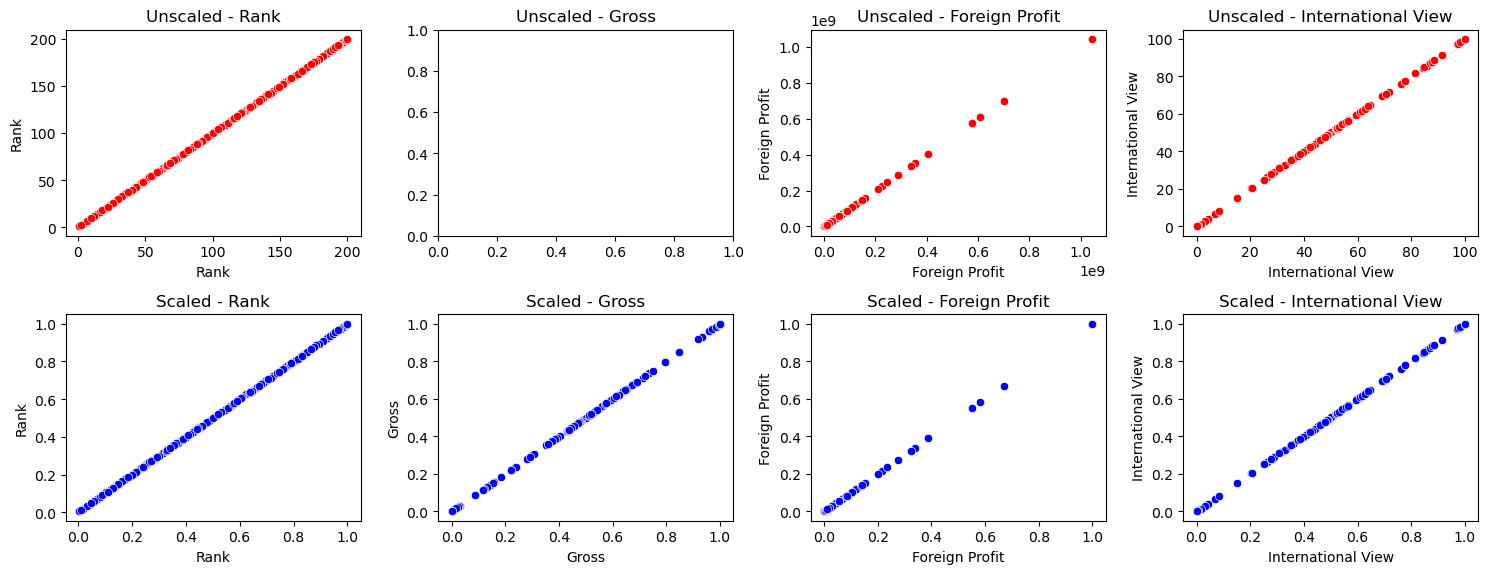

In [102]:
Scaled = pd.DataFrame(X_train_S,columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])
unScaled = pd.DataFrame(X_train,columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])
fig, axes = plt.subplots(nrows=2, ncols=len(Scaled.columns), figsize=(15, 6))

for idx, col in enumerate(Scaled.columns):
    
    # Unscaled Data Plot (Top Row)
    sns.scatterplot(x=unScaled[col], y=unScaled[col], ax=axes[0, idx], color='red')
    axes[0, idx].set_title(f'Unscaled - {col}')
    # Scaled Data Plot (Bottom Row)
    sns.scatterplot(x=Scaled[col], y=Scaled[col], ax=axes[1, idx], color='blue')
    axes[1, idx].set_title(f'Scaled - {col}')

# Adjust layout
plt.tight_layout()
plt.show()

c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tesla\AppData\Local\Temp\ipykernel_24028\3369573021.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(unSca

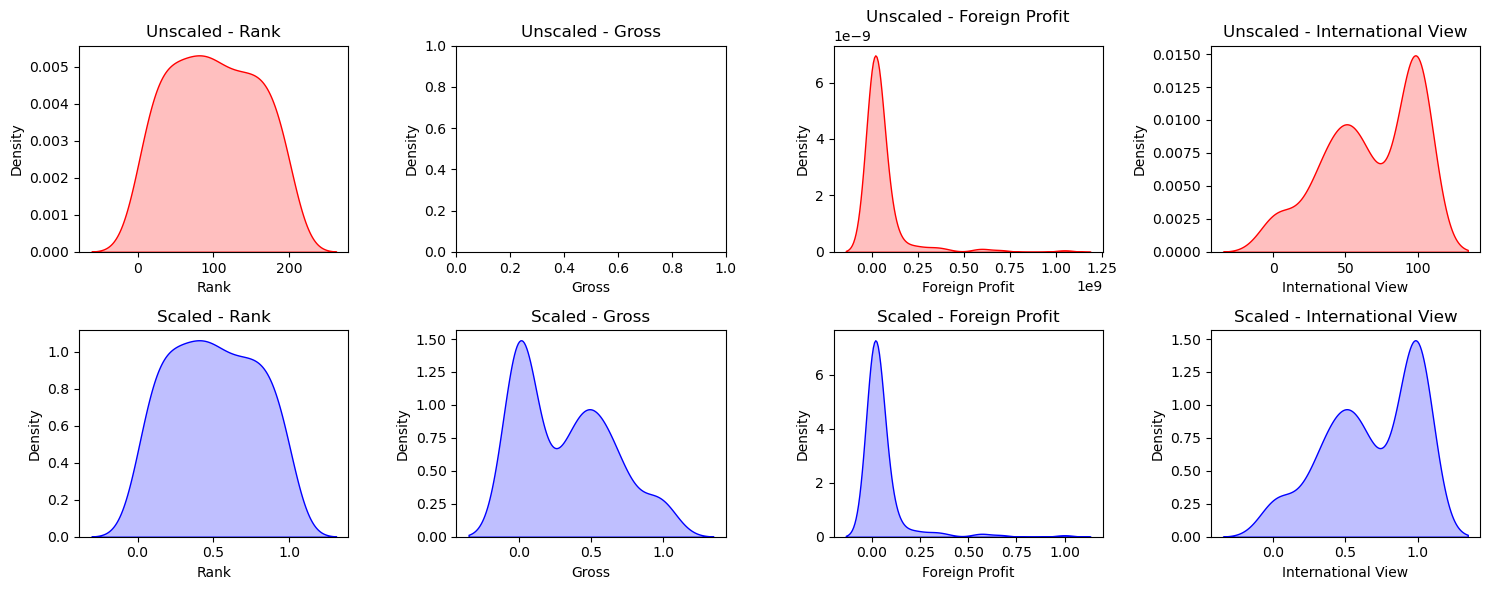

In [103]:
Scaled = pd.DataFrame(X_train_S, columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])
unScaled = pd.DataFrame(X_train, columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])

# Create subplots (2 rows: unscaled & scaled, columns for each feature)
fig, axes = plt.subplots(nrows=2, ncols=len(Scaled.columns), figsize=(15, 6))

for idx, col in enumerate(Scaled.columns):
    # KDE for Unscaled Data (Top Row)
    sns.kdeplot(unScaled[col], ax=axes[0, idx], color='red', fill=True)
    axes[0, idx].set_title(f'Unscaled - {col}')
    
    # KDE for Scaled Data (Bottom Row)
    sns.kdeplot(Scaled[col], ax=axes[1, idx], color='blue', fill=True)
    axes[1, idx].set_title(f'Scaled - {col}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


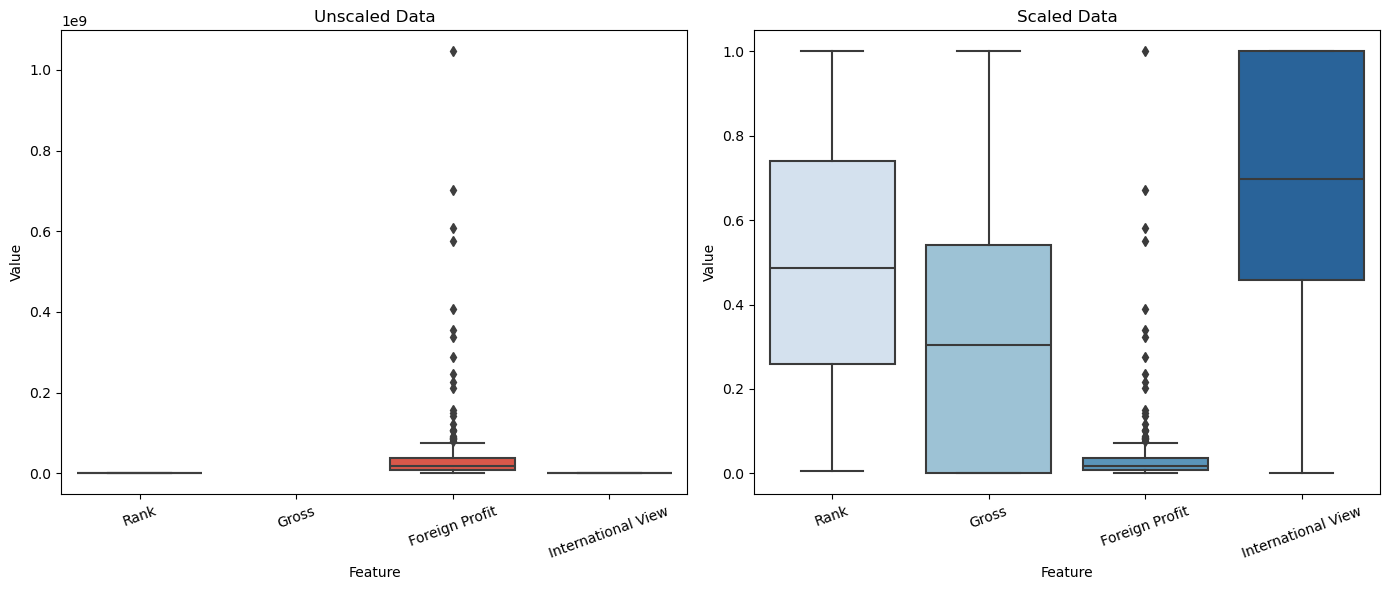

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating DataFrames
Scaled = pd.DataFrame(X_train_S, columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])
unScaled = pd.DataFrame(X_train, columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])

# Melt DataFrames for Seaborn
unScaled_melted = unScaled.melt(var_name="Feature", value_name="Value")
Scaled_melted = Scaled.melt(var_name="Feature", value_name="Value")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Box plot for Unscaled Data
sns.boxplot(x="Feature", y="Value", data=unScaled_melted, ax=axes[0], palette="Reds")
axes[0].set_title("Unscaled Data")
axes[0].tick_params(axis='x', rotation=20)

# Box plot for Scaled Data
sns.boxplot(x="Feature", y="Value", data=Scaled_melted, ax=axes[1], palette="Blues")
axes[1].set_title("Scaled Data")
axes[1].tick_params(axis='x', rotation=20)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='International View', ylabel='Rank'>

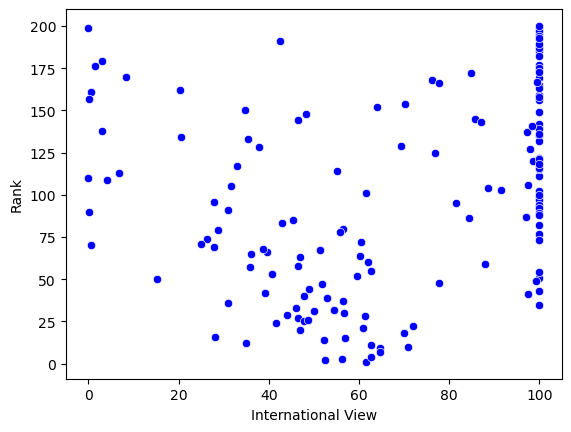

In [105]:
sns.scatterplot(x=unScaled['International View'], y=unScaled['Rank'],  color='blue')

<Axes: xlabel='International View', ylabel='Foreign Profit'>

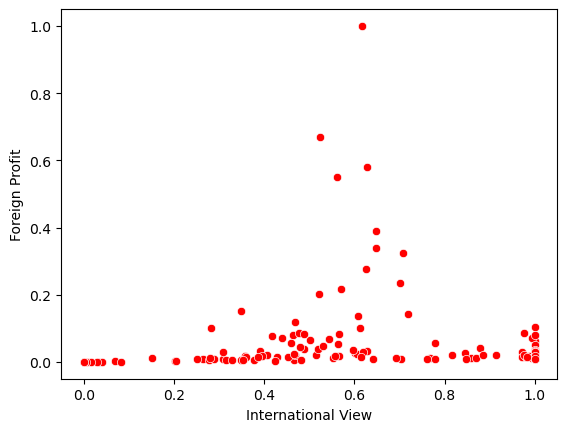

In [106]:
sns.scatterplot(x=Scaled['International View'], y=Scaled['Foreign Profit'], color='red')
# plt.yticks(np.arange(0,10))